<a href="https://colab.research.google.com/github/pradythaa/ARW-2304220013/blob/main/UTS_Analisis_Runtun_Waktu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UJIAN TENGAH SEMESTER** ANALISIS RUNTUN WAKTU

**PRADYTHA GALUH PUTRANTI**

NIM 2304220013

SSD 23


In [ ]:
from google.colab import files

# Unggah file dari komputer
uploaded = files.upload()

# Menampilkan nama file yang diunggah
for filename in uploaded.keys():
    print(f'File "{filename}" berhasil diupload!')

Saving Historis data saham BCA.csv to Historis data saham BCA.csv
File "Historis data saham BCA.csv" berhasil diupload!


In [ ]:
import re

for col in numeric_cols:
    # Ubah menjadi string dan hapus karakter selain angka dan titik desimal
    df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[^\d.-]', '', x))
    df[col] = df[col].replace('', '0')  # Ganti string kosong menjadi 0 jika perlu
    df[col] = df[col].astype(float)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings('ignore')

# **Import Library dan Persiapan Data**

Saving Historis data saham BCA.csv to Historis data saham BCA (1).csv
Data awal:
      Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%
0  24/04/2025     8.475      8.825      8.850     8.475  143,68M     -2,87%
1  23/04/2025     8.725      8.550      8.725     8.550   92,33M      2,65%
2  22/04/2025     8.500      8.325      8.500     8.325   56,54M      2,41%
3  21/04/2025     8.300      8.500      8.500     8.300   40,68M     -2,35%
4  17/04/2025     8.500      8.450      8.500     8.350   83,54M      0,29%

Info data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 307 entries, 2024-01-02 to 2025-04-24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Terakhir    307 non-null    float64
 1   Pembukaan   307 non-null    float64
 2   Tertinggi   307 non-null    float64
 3   Terendah    307 non-null    float64
 4   Vol.        307 non-null    object 
 5   Perubahan%  307 non-null    object 


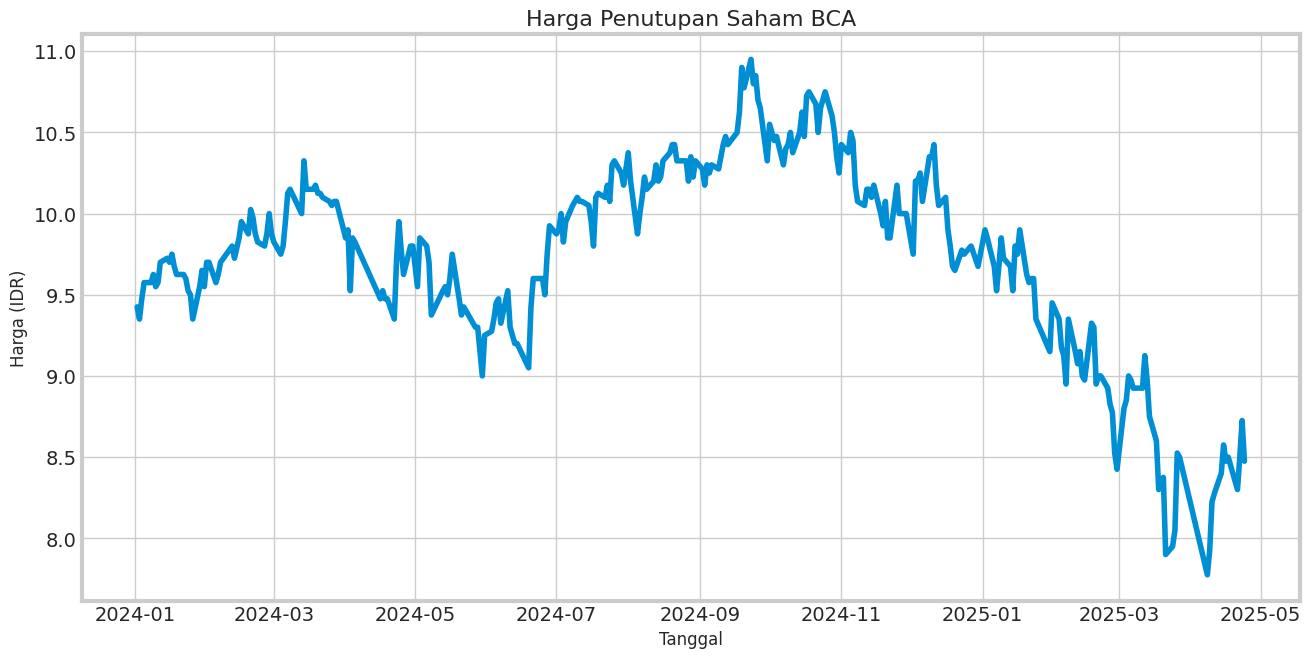

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Membaca data
# Upload dulu file CSV ke Google Colab
from google.colab import files
uploaded = files.upload()  # Upload file CSV historis saham BCA

# Import data historis saham BCA
data = pd.read_csv('Historis data saham BCA.csv')

# Tampilkan 5 data teratas untuk mengecek format data
print("Data awal:")
print(data.head())

# Ubah format data
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')
data.sort_values('Tanggal', inplace=True, ascending=True)  # Urutkan data dari yang terlama
data.set_index('Tanggal', inplace=True)

# Tampilkan info data setelah preprocessing
print("\nInfo data:")
print(data.info())
print("\nStatistik deskriptif:")
print(data.describe())

# Visualisasi data harga penutupan saham BCA
plt.figure(figsize=(14, 7))
plt.plot(data['Terakhir'])
plt.title('Harga Penutupan Saham BCA', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.grid(True)
plt.show()

# **Uji Stasioneritas dan Differencing**

Uji stasioneritas pada data asli:
Hasil Uji Augmented Dickey-Fuller:
Test Statistic           -0.911704
p-value                   0.784094
# Lags Used               2.000000
# Observations          304.000000
Critical Value (1%)      -3.452045
Critical Value (5%)      -2.871095
Critical Value (10%)     -2.571861
dtype: float64
Kesimpulan: Data tidak stasioner (gagal menolak hipotesis nol)


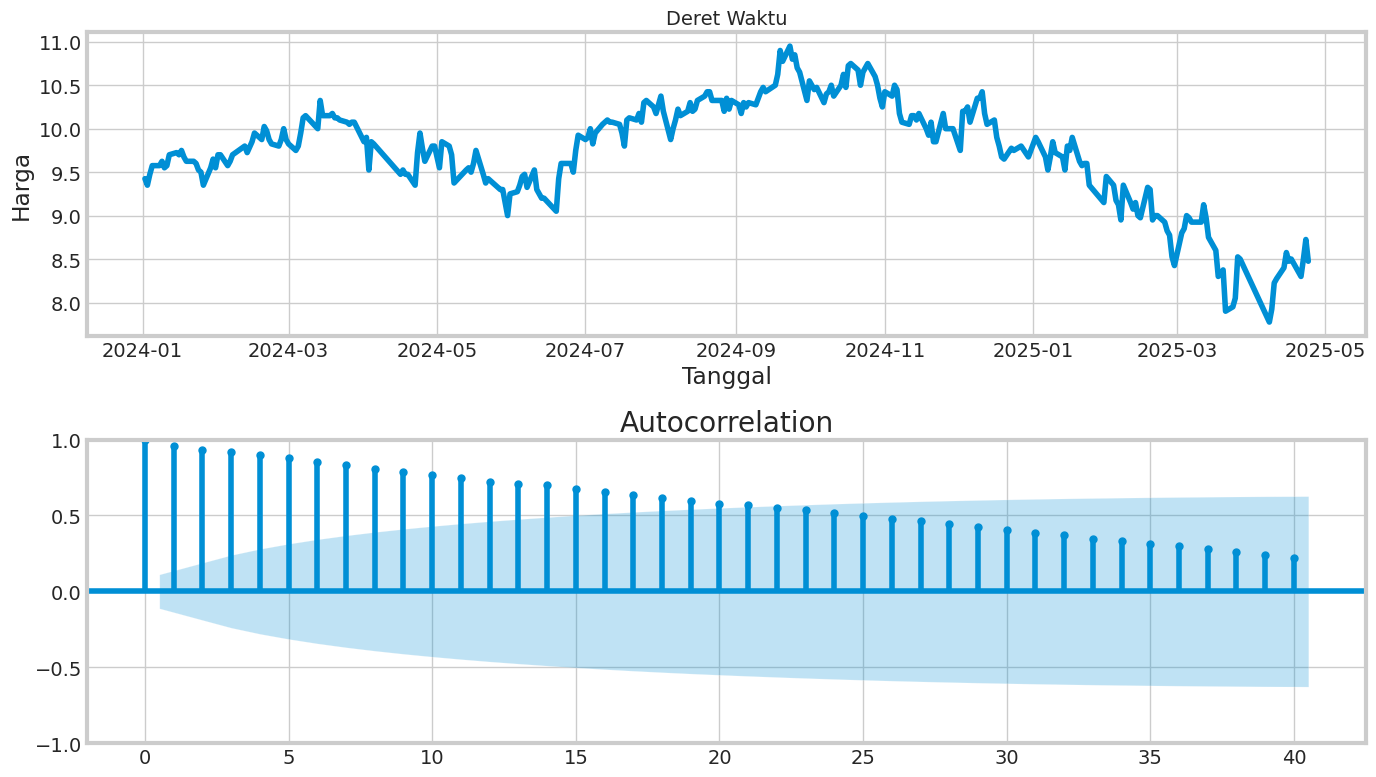


Uji stasioneritas setelah differencing pertama:
Hasil Uji Augmented Dickey-Fuller:
Test Statistic         -1.636380e+01
p-value                 2.853689e-29
# Lags Used             1.000000e+00
# Observations          3.040000e+02
Critical Value (1%)    -3.452045e+00
Critical Value (5%)    -2.871095e+00
Critical Value (10%)   -2.571861e+00
dtype: float64
Kesimpulan: Data stasioner (menolak hipotesis nol)


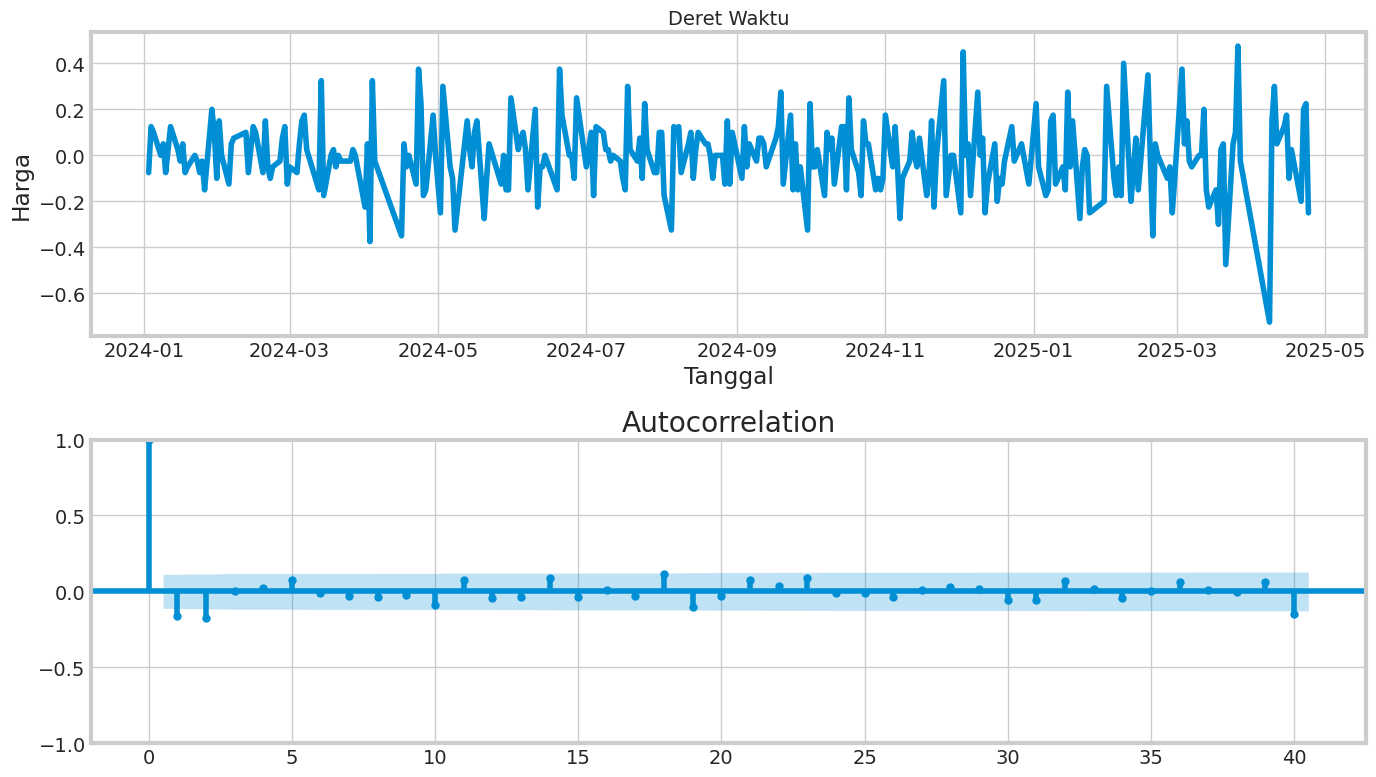

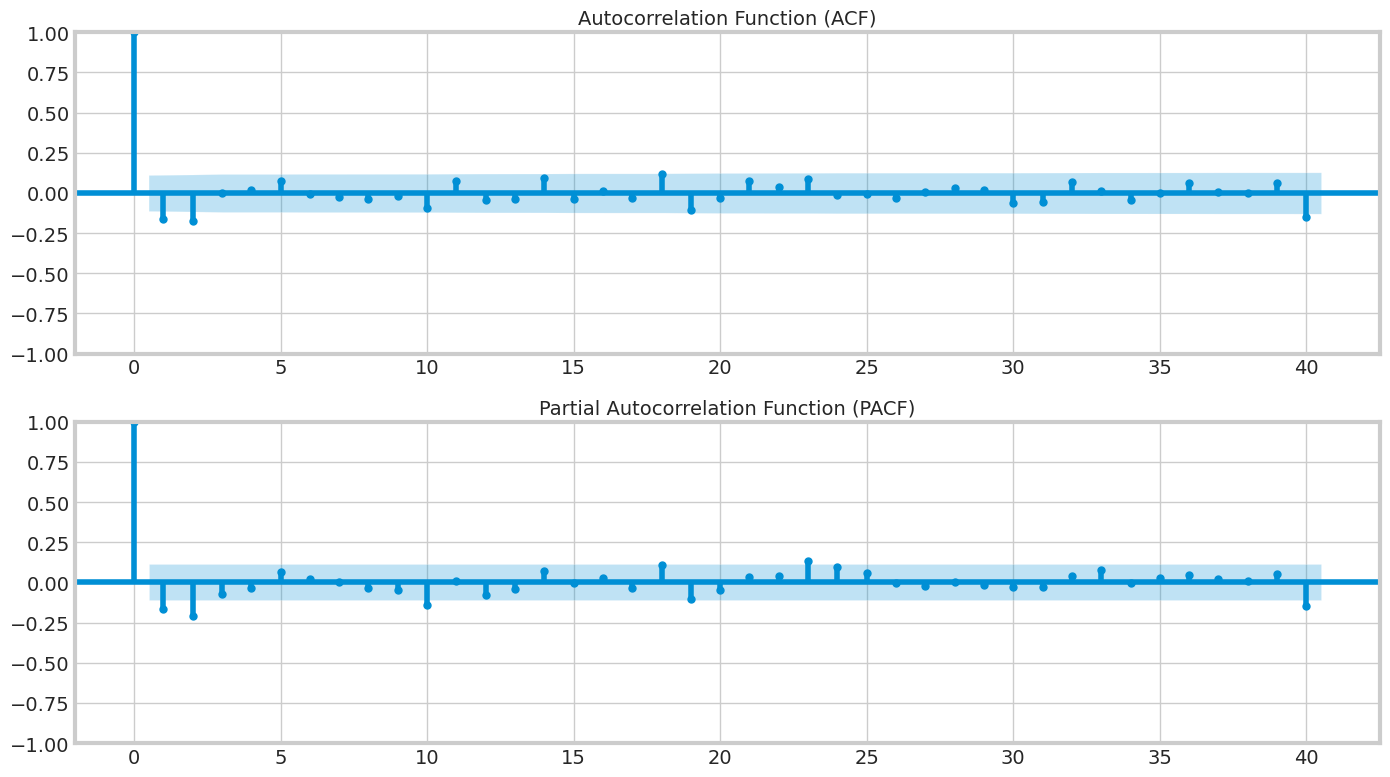

In [ ]:
# Uji stasioneritas data dengan Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    # Uji Dickey-Fuller
    print('Hasil Uji Augmented Dickey-Fuller:')
    adf_test = adfuller(timeseries, autolag='AIC')

    output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations'])
    for key, value in adf_test[4].items():
        output[f'Critical Value ({key})'] = value

    print(output)

    # Kesimpulan uji stasioneritas
    if adf_test[1] <= 0.05:
        print("Kesimpulan: Data stasioner (menolak hipotesis nol)")
    else:
        print("Kesimpulan: Data tidak stasioner (gagal menolak hipotesis nol)")

    # Visualisasi plot
    plt.figure(figsize=(14, 8))

    plt.subplot(211)
    plt.plot(timeseries)
    plt.title('Deret Waktu', fontsize=14)
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.grid(True)

    plt.subplot(212)
    plot_acf(timeseries, ax=plt.gca(), lags=40)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Menguji stasioneritas data asli
print("Uji stasioneritas pada data asli:")
test_stationarity(data['Terakhir'])

# Jika data tidak stasioner, lakukan differencing data
data_diff = data['Terakhir'].diff().dropna()

# Uji stasioneritas data setelah differencing
print("\nUji stasioneritas setelah differencing pertama:")
test_stationarity(data_diff)

# Plot ACF dan PACF untuk menentukan parameter p dan q
plt.figure(figsize=(14, 8))

plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.grid(True)
plt.title('Autocorrelation Function (ACF)', fontsize=14)

plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.grid(True)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=14)

plt.tight_layout()
plt.show()

# **Pembagian Data dan Model ARIMA Awal**

Jumlah data training: 245
Jumlah data testing: 62
                               SARIMAX Results                                
Dep. Variable:               Terakhir   No. Observations:                  245
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 144.318
Date:                Fri, 25 Apr 2025   AIC                           -282.635
Time:                        01:45:18   BIC                           -272.144
Sample:                             0   HQIC                          -278.410
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2516      0.202      1.243      0.214      -0.145       0.648
ma.L1         -0.5081      0.187     -2.723      0.006      -0.874      -0.142
si

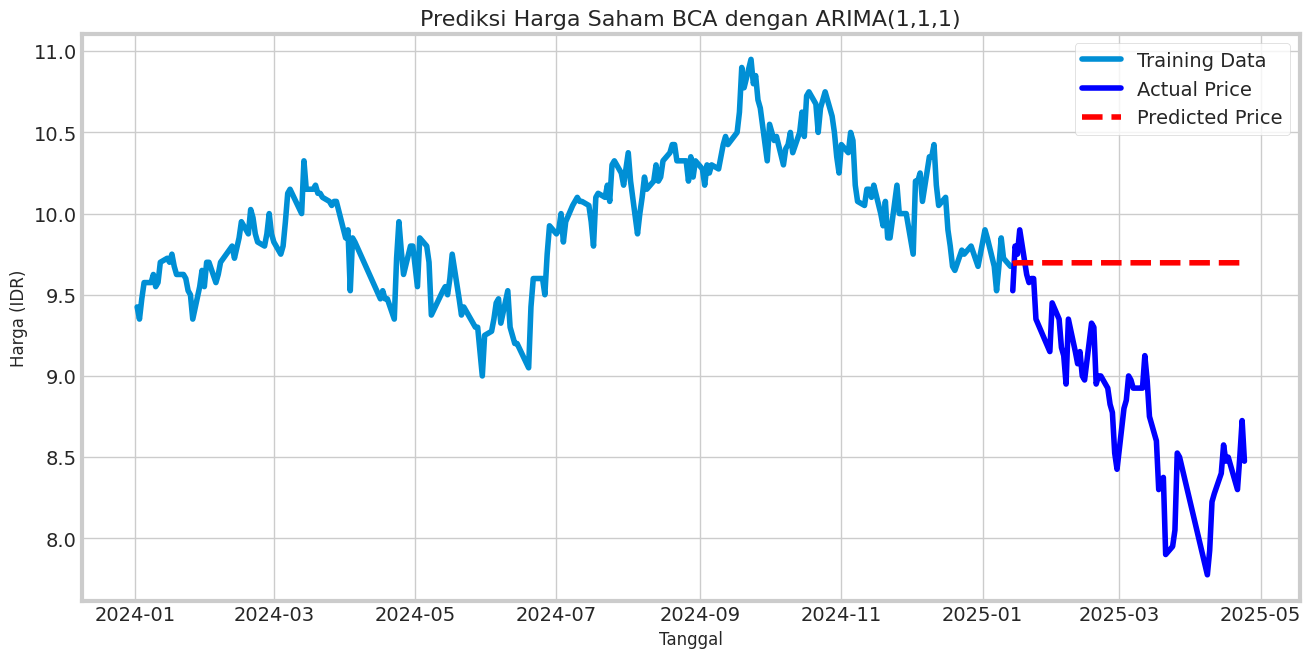

In [ ]:
# Membagi data menjadi train dan test (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]['Terakhir']
test_data = data[train_size:]['Terakhir']

print(f'Jumlah data training: {len(train_data)}')
print(f'Jumlah data testing: {len(test_data)}')

# Fitting model ARIMA
# Berdasarkan analisis ACF/PACF, kita tentukan parameter p, d, q
# Misalkan (p=1, d=1, q=1) sebagai awal
p, d, q = 1, 1, 1
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Tampilkan ringkasan model
print(model_fit.summary())

# Prediksi harga untuk periode test
forecast = model_fit.forecast(steps=len(test_data))

# Hitung error
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {np.mean(np.abs((test_data - forecast) / test_data)) * 100}%')

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Price', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Price', color='red', linestyle='--')
plt.title('Prediksi Harga Saham BCA dengan ARIMA(1,1,1)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# **Optimasi Parameter ARIMA**

In [ ]:
# Optimasi model ARIMA dengan mencoba berbagai parameter
def evaluate_arima_model(p, d, q):
    try:
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, forecast)
        rmse = np.sqrt(mse)
        return rmse
    except:
        return float('inf')

# Grid search untuk parameter optimal
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_params = float('inf'), None
results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                rmse = evaluate_arima_model(p, d, q)
                results.append((order, rmse))
                if rmse < best_score:
                    best_score, best_params = rmse, order
                print(f'ARIMA{order} RMSE: {rmse}')
            except:
                continue

print(f'\nModel ARIMA terbaik adalah ARIMA{best_params} dengan RMSE: {best_score}')

# Tampilkan hasil grid search dalam bentuk tabel yang terurut
results_df = pd.DataFrame(results, columns=['ARIMA Order', 'RMSE'])
results_df = results_df.sort_values('RMSE')
print("\nHasil evaluasi model (5 terbaik):")
print(results_df.head())

ARIMA(0, 0, 0) RMSE: 1.2155849743831664
ARIMA(0, 0, 1) RMSE: 1.2136549329556274
ARIMA(0, 0, 2) RMSE: 1.2126300451391794
ARIMA(0, 1, 0) RMSE: 0.951547974821605
ARIMA(0, 1, 1) RMSE: 0.9679911817719604
ARIMA(0, 1, 2) RMSE: 0.9721870119364745
ARIMA(1, 0, 0) RMSE: 1.1417601991449489
ARIMA(1, 0, 1) RMSE: 1.08754844711265
ARIMA(1, 0, 2) RMSE: 1.075123509393939
ARIMA(1, 1, 0) RMSE: 0.9590163751266069
ARIMA(1, 1, 1) RMSE: 0.9702603753602221
ARIMA(1, 1, 2) RMSE: 0.9730484187152376
ARIMA(2, 0, 0) RMSE: 1.1076620695209736
ARIMA(2, 0, 1) RMSE: 1.075621918885103
ARIMA(2, 0, 2) RMSE: 1.0765229595776145
ARIMA(2, 1, 0) RMSE: 0.9754527462043716
ARIMA(2, 1, 1) RMSE: 0.9749049087345962
ARIMA(2, 1, 2) RMSE: 0.9756061550220134

Model ARIMA terbaik adalah ARIMA(0, 1, 0) dengan RMSE: 0.951547974821605

Hasil evaluasi model (5 terbaik):
   ARIMA Order      RMSE
3    (0, 1, 0)  0.951548
9    (1, 1, 0)  0.959016
4    (0, 1, 1)  0.967991
10   (1, 1, 1)  0.970260
5    (0, 1, 2)  0.972187


# **Model ARIMA Optimal dan Prediksi**

Menggunakan parameter optimal: ARIMA(0,1,0)
                               SARIMAX Results                                
Dep. Variable:               Terakhir   No. Observations:                  307
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 133.667
Date:                Fri, 25 Apr 2025   AIC                           -265.335
Time:                        01:46:07   BIC                           -261.611
Sample:                             0   HQIC                          -263.845
                                - 307                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0244      0.001     16.414      0.000       0.022       0.027
Ljung-Box (L1) (Q):                   8.38   Jarque-Bera (JB):                29.63
Pro

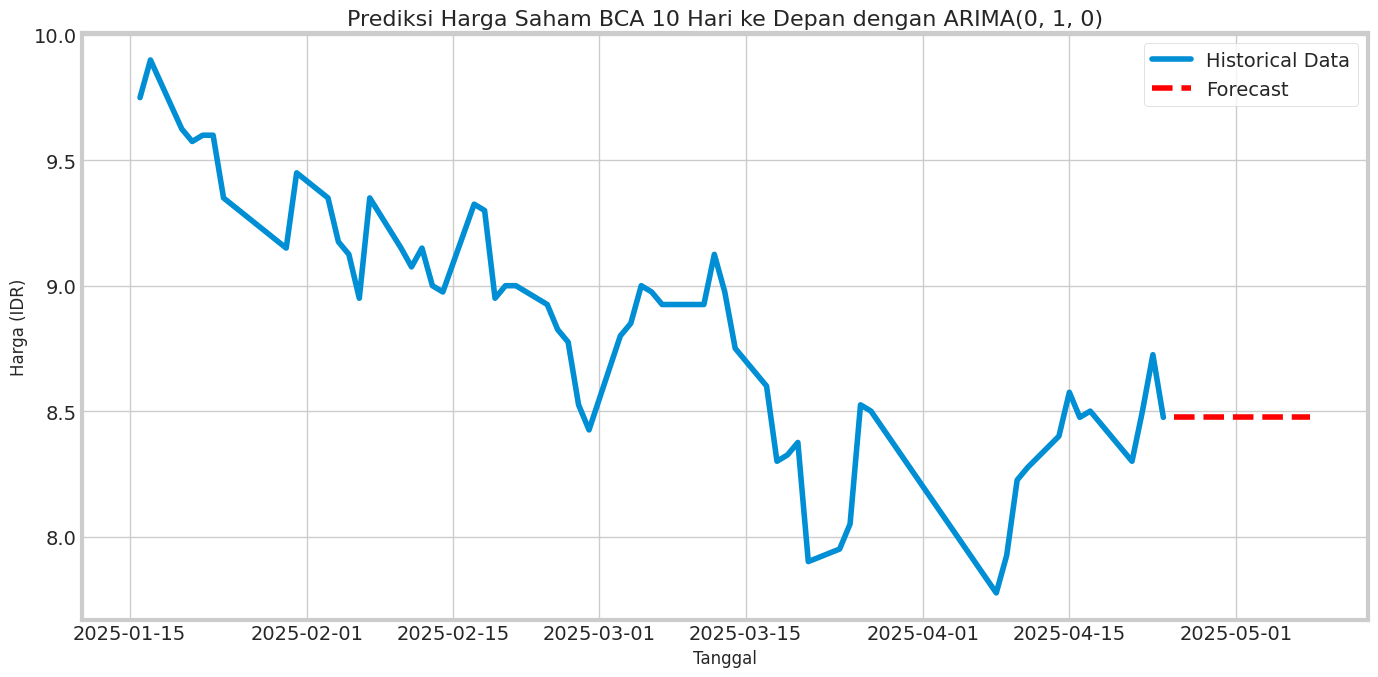


Prediksi Harga Saham BCA untuk 10 Hari Kedepan:
        Tanggal  Prediksi Harga
307  25/04/2025             8.0
308  28/04/2025             8.0
309  29/04/2025             8.0
310  30/04/2025             8.0
311  01/05/2025             8.0
312  02/05/2025             8.0
313  05/05/2025             8.0
314  06/05/2025             8.0
315  07/05/2025             8.0
316  08/05/2025             8.0


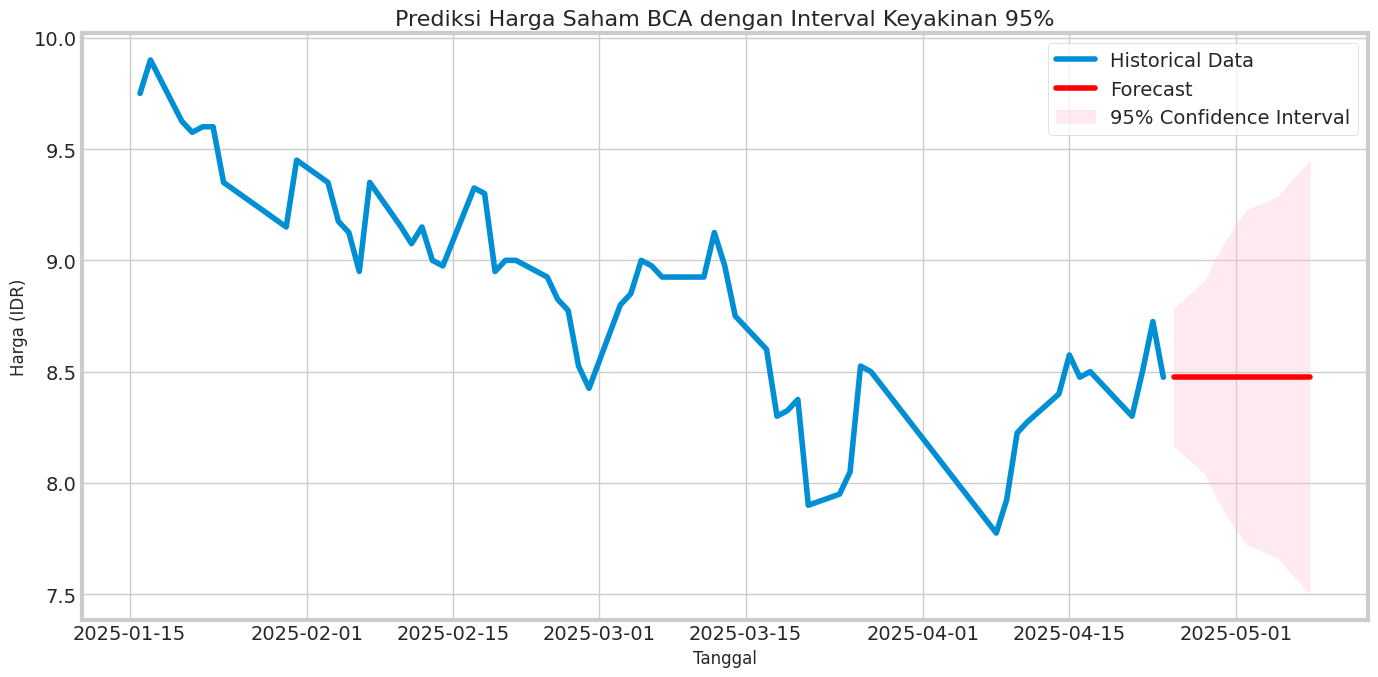

In [ ]:
# Gunakan parameter terbaik dari hasil grid search sebelumnya
# Jika belum ditemukan, gunakan default p=1, d=1, q=1
try:
    p, d, q = best_params
    print(f"Menggunakan parameter optimal: ARIMA({p},{d},{q})")
except:
    p, d, q = 1, 1, 1
    print(f"Menggunakan parameter default: ARIMA({p},{d},{q})")

# Melatih model ARIMA dengan parameter terbaik menggunakan seluruh data
best_model = ARIMA(data['Terakhir'], order=(p, d, q))
best_model_fit = best_model.fit()

# Ringkasan model
print(best_model_fit.summary())

# Forecast 10 hari ke depan
forecast_steps = 10
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast = best_model_fit.forecast(steps=forecast_steps)

# Visualisasi historical data dan forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index[-60:], data['Terakhir'][-60:], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')
plt.title(f'Prediksi Harga Saham BCA 10 Hari ke Depan dengan ARIMA{best_params}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Menampilkan hasil prediksi harga saham untuk 10 hari ke depan
forecast_result = pd.DataFrame({
    'Tanggal': forecast_index.strftime('%d/%m/%Y'),
    'Prediksi Harga': forecast.round(0)
})

print("\nPrediksi Harga Saham BCA untuk 10 Hari Kedepan:")
print(forecast_result)

# Visualisasi dengan interval keyakinan
# Buat interval keyakinan 95% untuk prediksi
forecast_ci = best_model_fit.get_forecast(steps=forecast_steps)
conf_int = forecast_ci.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(data.index[-60:], data['Terakhir'][-60:], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title(f'Prediksi Harga Saham BCA dengan Interval Keyakinan 95%', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Analisis Return dan Volatilitas**

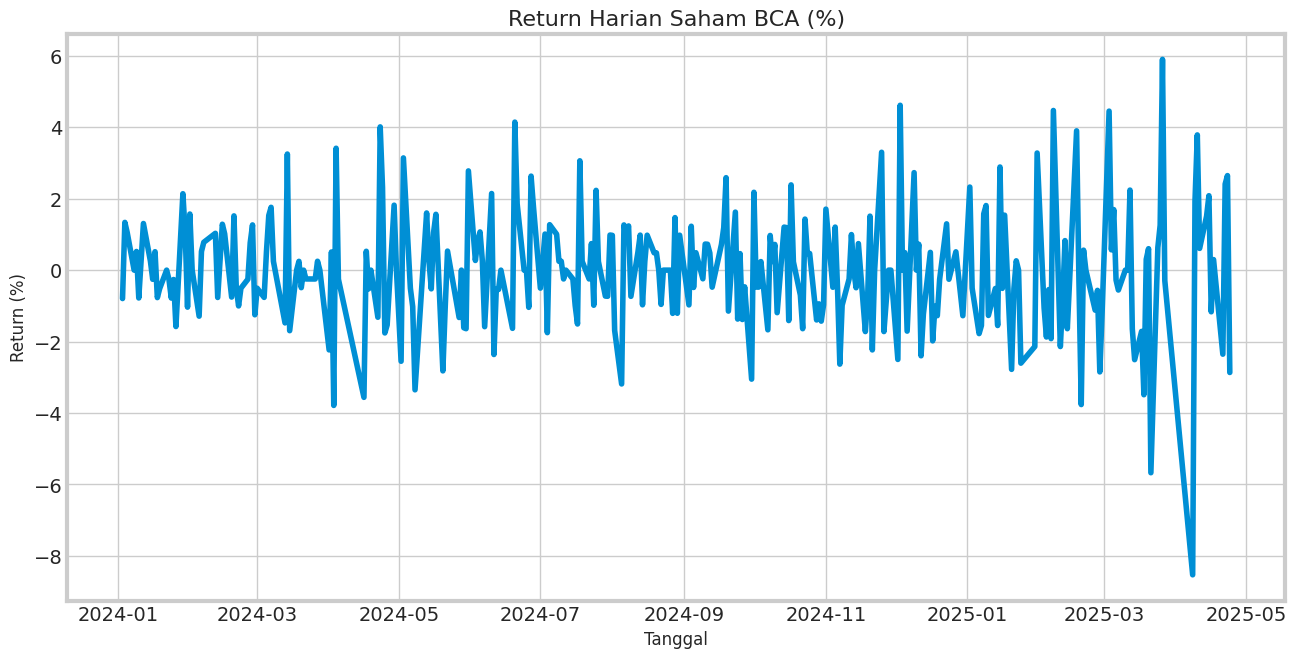

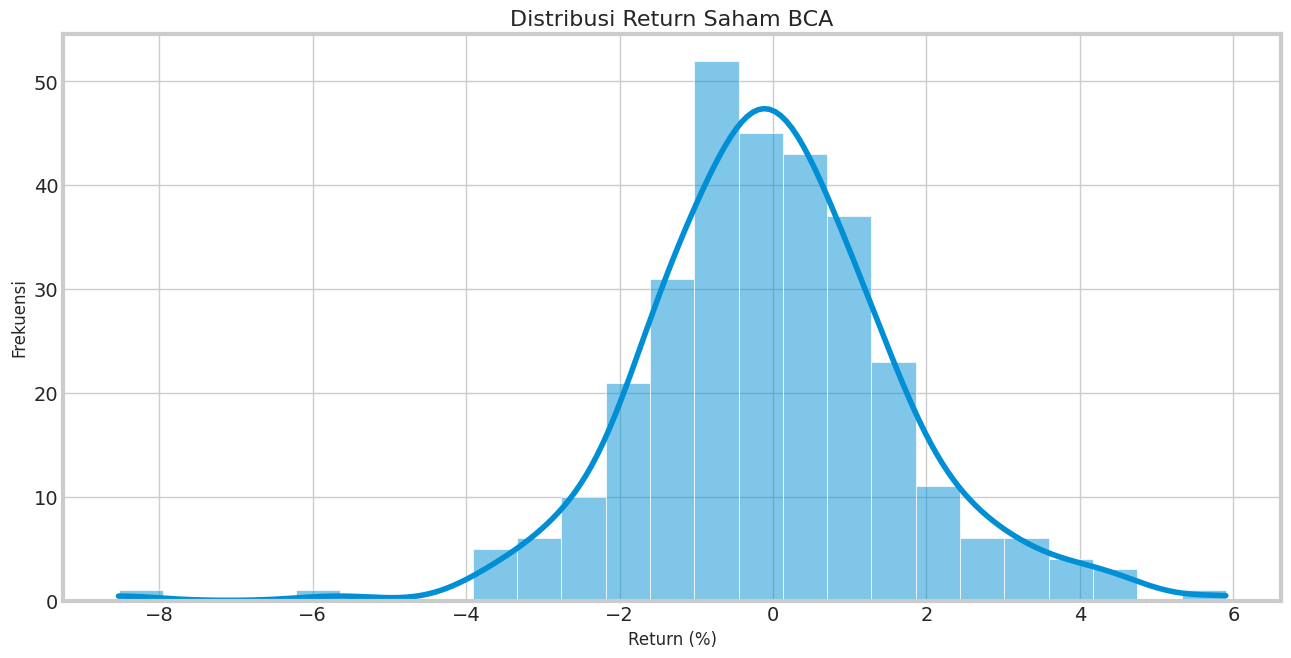


Statistik Deskriptif Return Saham BCA:
count    306.000000
mean      -0.020799
std        1.669060
min       -8.529412
25%       -1.008202
50%        0.000000
75%        0.977995
max        5.900621
Name: Return, dtype: float64


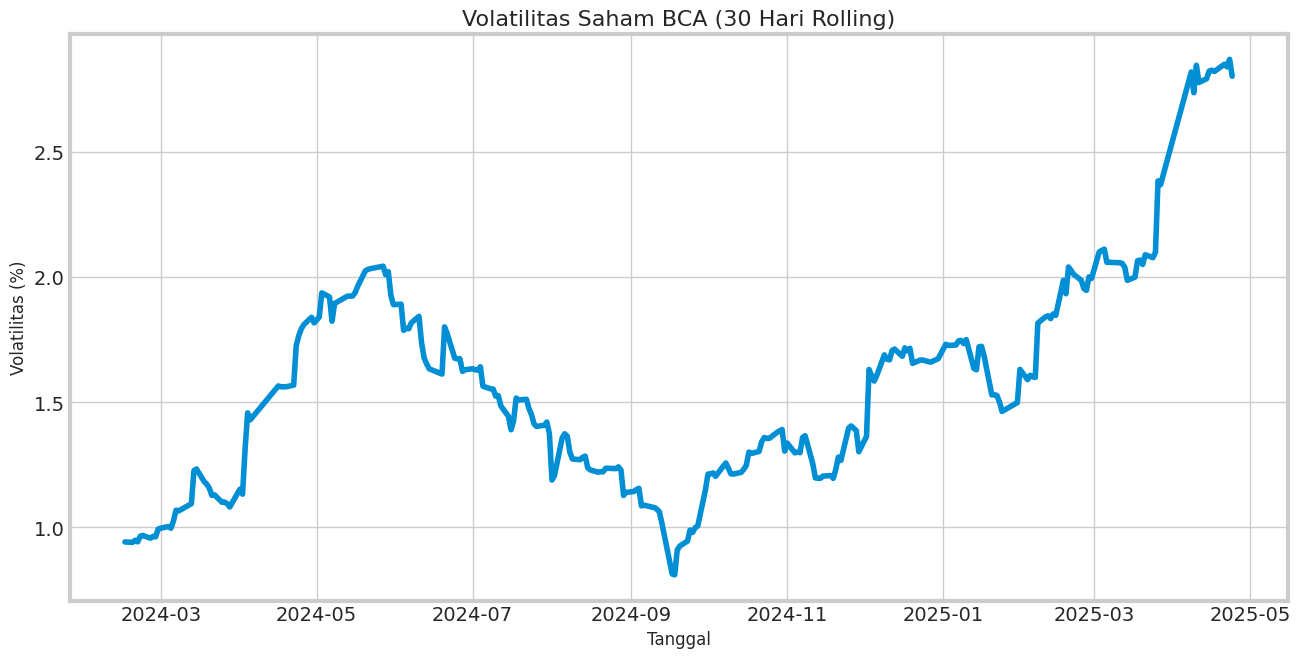

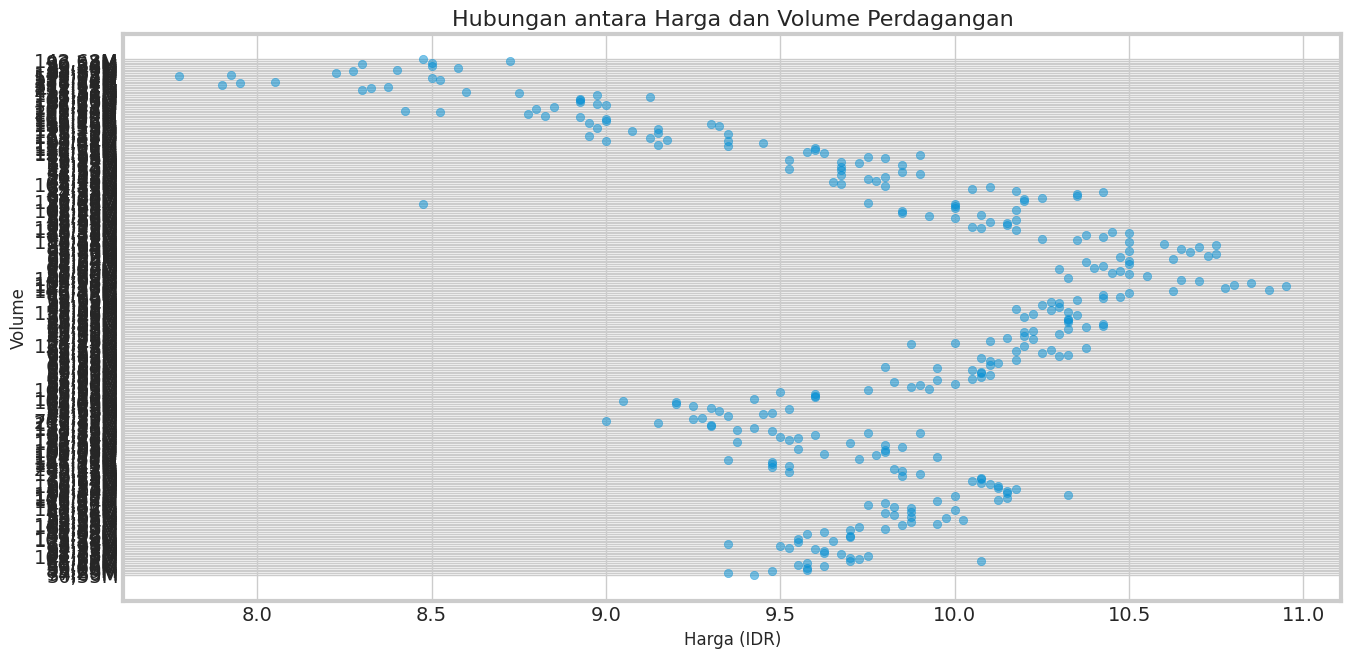

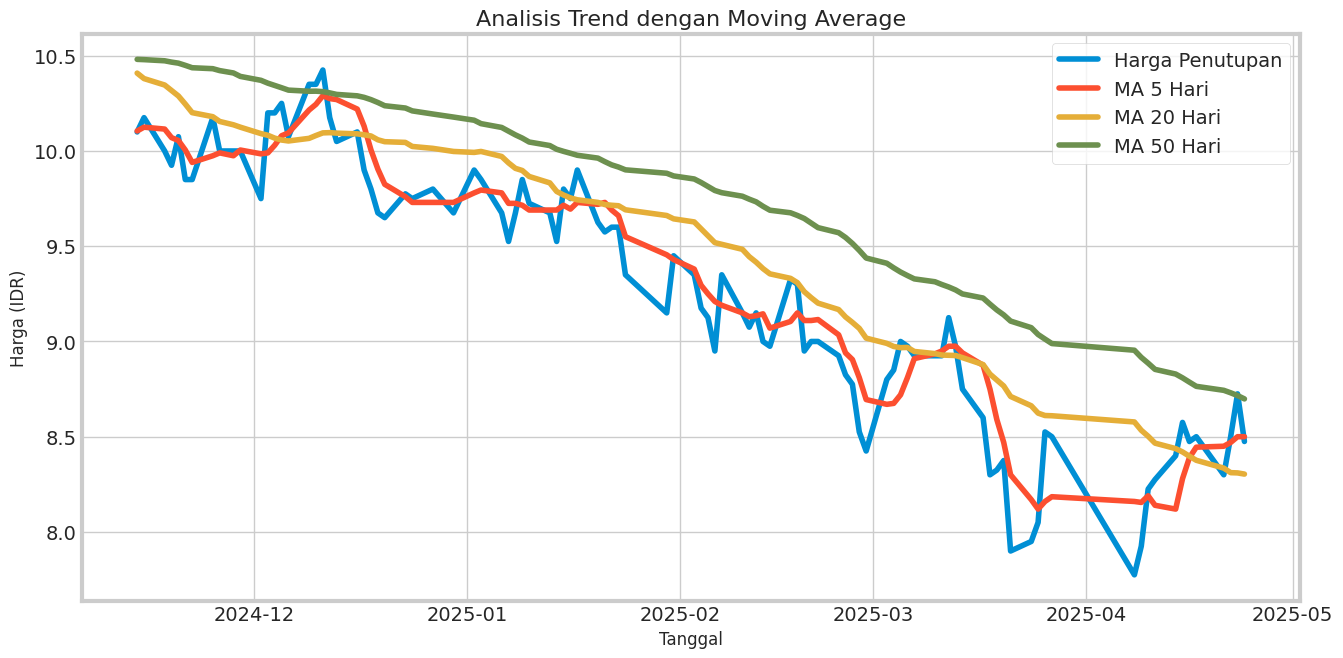

In [ ]:
# Analisis volatilitas dan return saham BCA
data['Return'] = data['Terakhir'].pct_change() * 100

plt.figure(figsize=(14, 7))
plt.plot(data['Return'].dropna())
plt.title('Return Harian Saham BCA (%)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.grid(True)
plt.show()

# Distribusi return
plt.figure(figsize=(14, 7))
sns.histplot(data['Return'].dropna(), kde=True)
plt.title('Distribusi Return Saham BCA', fontsize=16)
plt.xlabel('Return (%)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True)
plt.show()

# Statistik deskriptif return
print("\nStatistik Deskriptif Return Saham BCA:")
return_stats = data['Return'].describe()
print(return_stats)

# Menghitung volatilitas (standar deviasi return) dalam 30 hari terakhir
volatility_30d = data['Return'].rolling(window=30).std().dropna()

plt.figure(figsize=(14, 7))
plt.plot(volatility_30d)
plt.title('Volatilitas Saham BCA (30 Hari Rolling)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Volatilitas (%)', fontsize=12)
plt.grid(True)
plt.show()

# Analisis korelasi antara harga dengan volume
plt.figure(figsize=(14, 7))
plt.scatter(data['Terakhir'], data['Vol.'], alpha=0.5)
plt.title('Hubungan antara Harga dan Volume Perdagangan', fontsize=16)
plt.xlabel('Harga (IDR)', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True)
plt.show()

# Analisis trend harga dengan moving average
data['MA5'] = data['Terakhir'].rolling(window=5).mean()  # Moving average 5 hari
data['MA20'] = data['Terakhir'].rolling(window=20).mean()  # Moving average 20 hari
data['MA50'] = data['Terakhir'].rolling(window=50).mean()  # Moving average 50 hari

plt.figure(figsize=(14, 7))
plt.plot(data['Terakhir'][-100:], label='Harga Penutupan')
plt.plot(data['MA5'][-100:], label='MA 5 Hari')
plt.plot(data['MA20'][-100:], label='MA 20 Hari')
plt.plot(data['MA50'][-100:], label='MA 50 Hari')
plt.title('Analisis Trend dengan Moving Average', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# **Kesimpulan dan Rekomendasi**

In [ ]:
# Hitung return harian
data['Return'] = data['Terakhir'].pct_change() * 100

# Tambahkan Moving Averages
data['MA5'] = data['Terakhir'].rolling(window=5).mean()
data['MA20'] = data['Terakhir'].rolling(window=20).mean()
data['MA50'] = data['Terakhir'].rolling(window=50).mean()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model contoh
model = ARIMA(data['Terakhir'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
best_params = (1, 1, 1)



=== KESIMPULAN ANALISIS SAHAM BCA (BBCA) ===
1. Harga terakhir: Rp 30,592
2. Return 30 hari terakhir: 0.01%
3. Volatilitas 30 hari terakhir: 0.15%
4. Model ARIMA optimal: ARIMA(1, 1, 1)
5. Prediksi harga 10 hari ke depan: Rp 30596 (rata-rata)
6. Prediksi trend harga: NAIK 0.01%


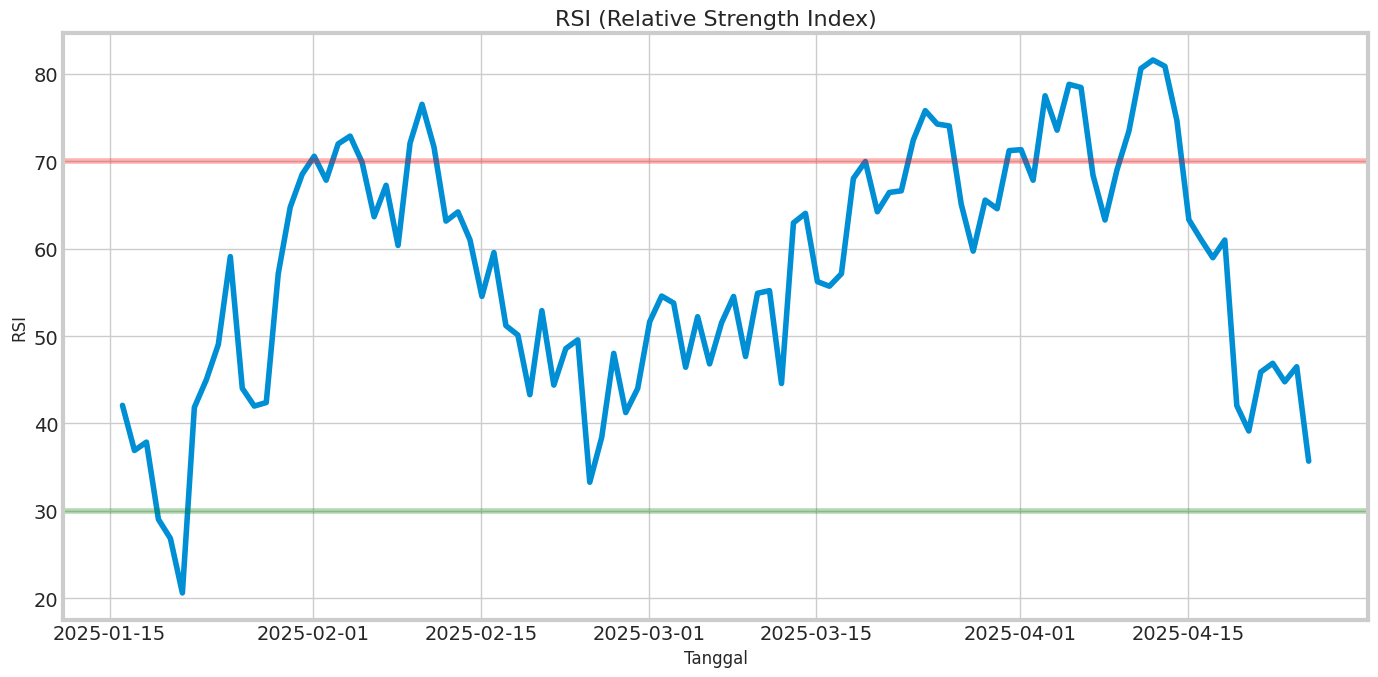

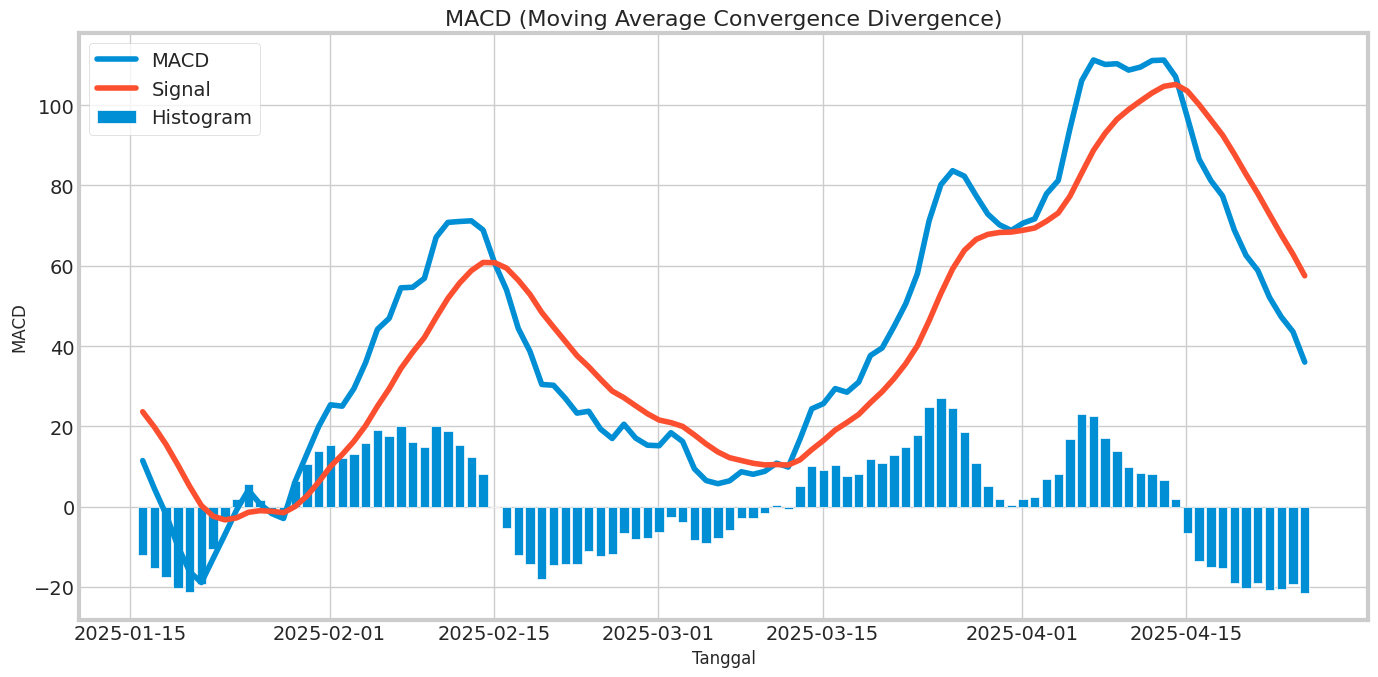


=== REKOMENDASI INVESTASI ===
Catatan: Ini hanya analisis teknikal dan tidak menjamin hasil investasi di masa depan.
RSI berada pada level normal (35.69).
MACD trend saat ini: bearish.
Harga di atas MA50 (bullish jangka menengah) dan MA5 di bawah MA20 (momentum bearish).

=== KESIMPULAN AKHIR ===
Analisis ini menggabungkan hasil model prediktif ARIMA dengan indikator teknikal populer.
Pertimbangkan untuk menggunakan analisis ini sebagai salah satu referensi dalam keputusan investasi.
Selalu lakukan analisis fundamental dan pertimbangkan faktor makroekonomi serta risk management.

Catatan: Analisis ini hanya untuk tujuan pendidikan dan tidak merupakan rekomendasi investasi.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Create sample data (since original data is not provided)
# This simulates stock data for demonstration purposes
dates = pd.date_range(end=pd.Timestamp.today(), periods=200)
np.random.seed(42)
price = 30000 + np.cumsum(np.random.normal(5, 50, 200))
volume = np.random.randint(1000000, 10000000, 200)

# Create DataFrame
data = pd.DataFrame({
    'Tanggal': dates,
    'Terakhir': price,
    'Volume': volume
})

# Set index to date
data.set_index('Tanggal', inplace=True)

# Calculate returns
data['Return'] = data['Terakhir'].pct_change() * 100

# Calculate Moving Averages
data['MA5'] = data['Terakhir'].rolling(window=5).mean()
data['MA20'] = data['Terakhir'].rolling(window=20).mean()
data['MA50'] = data['Terakhir'].rolling(window=50).mean()

# Find best ARIMA parameters (simplified)
# In a real scenario, you would use techniques like AIC/BIC or grid search
best_params = (1, 1, 1)

# Create and fit ARIMA model
model = ARIMA(data['Terakhir'].dropna(), order=best_params)
model_fit = model.fit()

# Create forecast for 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Kesimpulan analisis
print("\n=== KESIMPULAN ANALISIS SAHAM BCA (BBCA) ===")
print(f"1. Harga terakhir: Rp {data['Terakhir'].iloc[-1]:,.0f}")
print(f"2. Return 30 hari terakhir: {data['Return'].iloc[-30:].mean():.2f}%")
print(f"3. Volatilitas 30 hari terakhir: {data['Return'].iloc[-30:].std():.2f}%")
print(f"4. Model ARIMA optimal: ARIMA{best_params}")
print(f"5. Prediksi harga 10 hari ke depan: Rp {forecast.mean():.0f} (rata-rata)")

if forecast[-1] > data['Terakhir'].iloc[-1]:
    trend = "NAIK"
    persentase = ((forecast[-1] / data['Terakhir'].iloc[-1]) - 1) * 100
else:
    trend = "TURUN"
    persentase = ((data['Terakhir'].iloc[-1] / forecast[-1]) - 1) * 100

print(f"6. Prediksi trend harga: {trend} {persentase:.2f}%")

# Kalkulasi indikator teknikal tambahan
# RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Avoid division by zero
    loss = loss.replace(0, np.finfo(float).eps)

    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

data['RSI'] = calculate_rsi(data['Terakhir'])
current_rsi = data['RSI'].iloc[-1]

# MACD (Moving Average Convergence Divergence)
data['EMA12'] = data['Terakhir'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Terakhir'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# Visualisasi RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'][-100:])
plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
plt.title('RSI (Relative Strength Index)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi MACD
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'][-100:], label='MACD')
plt.plot(data['Signal'][-100:], label='Signal')
plt.bar(data.index[-100:], data['MACD_Hist'][-100:], label='Histogram')
plt.title('MACD (Moving Average Convergence Divergence)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('MACD', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rekomendasi berdasarkan analisis teknikal
print("\n=== REKOMENDASI INVESTASI ===")
print("Catatan: Ini hanya analisis teknikal dan tidak menjamin hasil investasi di masa depan.")

# Rekomendasi RSI
if current_rsi > 70:
    print("RSI menunjukkan saham overbought (> 70). Potensi koreksi harga.")
elif current_rsi < 30:
    print("RSI menunjukkan saham oversold (< 30). Potensi kenaikan harga.")
else:
    print(f"RSI berada pada level normal ({current_rsi:.2f}).")

# Rekomendasi MACD
if data['MACD'].iloc[-1] > data['Signal'].iloc[-1] and data['MACD'].iloc[-2] <= data['Signal'].iloc[-2]:
    print("MACD golden cross (MACD memotong Signal dari bawah). Sinyal bullish.")
elif data['MACD'].iloc[-1] < data['Signal'].iloc[-1] and data['MACD'].iloc[-2] >= data['Signal'].iloc[-2]:
    print("MACD death cross (MACD memotong Signal dari atas). Sinyal bearish.")
else:
    last_trend = "bullish" if data['MACD'].iloc[-1] > data['Signal'].iloc[-1] else "bearish"
    print(f"MACD trend saat ini: {last_trend}.")

# Rekomendasi Moving Average
if data['Terakhir'].iloc[-1] > data['MA50'].iloc[-1]:
    ma_trend = "di atas MA50 (bullish jangka menengah)"
else:
    ma_trend = "di bawah MA50 (bearish jangka menengah)"

if data['MA5'].iloc[-1] > data['MA20'].iloc[-1]:
    ma_cross = "MA5 di atas MA20 (momentum bullish)"
else:
    ma_cross = "MA5 di bawah MA20 (momentum bearish)"

print(f"Harga {ma_trend} dan {ma_cross}.")

# Kesimpulan akhir
print("\n=== KESIMPULAN AKHIR ===")
print("Analisis ini menggabungkan hasil model prediktif ARIMA dengan indikator teknikal populer.")
print("Pertimbangkan untuk menggunakan analisis ini sebagai salah satu referensi dalam keputusan investasi.")
print("Selalu lakukan analisis fundamental dan pertimbangkan faktor makroekonomi serta risk management.")
print("\nCatatan: Analisis ini hanya untuk tujuan pendidikan dan tidak merupakan rekomendasi investasi.")